In [3]:
import pandas as pd
import re

##Data Processing

###A. Data Transformation

In [4]:
df = pd.read_csv('/content/house_data.csv')
df.head()

,Unnamed: 0,date,price,description,location,bedrooms,bathrooms,land,floor
0,0,04/09/2024,"Rp5,9 Miliar",Dijual Rumah Di Salemba Jakarta Pusat Langsung...,"Senen, Jakarta Pusat",5,3,228 m²,270 m²
1,1,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,"Pasar Rebo, Jakarta Timur",3,2,90 m²,59 m²
2,2,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,"Ciracas, Jakarta Timur",3,2,90 m²,60 m²
3,3,14/08/2024,"Rp3,6 Miliar",MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,"Kebon Jeruk, Jakarta Barat",5,4,187 m²,178 m²
4,4,13/09/2024,Rp672 Juta,Rumah Baru 2 Lantai Minimalis Modern Premium D...,"Jagakarsa, Jakarta Selatan",3,2,60 m²,60 m²


In [5]:
df.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.head()

,date,price,description,location,bedrooms,bathrooms,land,floor
0,04/09/2024,"Rp5,9 Miliar",Dijual Rumah Di Salemba Jakarta Pusat Langsung...,"Senen, Jakarta Pusat",5,3,228 m²,270 m²
1,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,"Pasar Rebo, Jakarta Timur",3,2,90 m²,59 m²
2,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,"Ciracas, Jakarta Timur",3,2,90 m²,60 m²
3,14/08/2024,"Rp3,6 Miliar",MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,"Kebon Jeruk, Jakarta Barat",5,4,187 m²,178 m²
4,13/09/2024,Rp672 Juta,Rumah Baru 2 Lantai Minimalis Modern Premium D...,"Jagakarsa, Jakarta Selatan",3,2,60 m²,60 m²


In [7]:
# Split the 'location' column into 'district' and 'city'
df[['district', 'city']] = df['location'].str.split(', ', expand=True)

df.drop(columns=['location'], axis = 1, inplace = True)

In [8]:
df.head()

,date,price,description,bedrooms,bathrooms,land,floor,district,city
0,04/09/2024,"Rp5,9 Miliar",Dijual Rumah Di Salemba Jakarta Pusat Langsung...,5,3,228 m²,270 m²,Senen,Jakarta Pusat
1,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,3,2,90 m²,59 m²,Pasar Rebo,Jakarta Timur
2,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,3,2,90 m²,60 m²,Ciracas,Jakarta Timur
3,14/08/2024,"Rp3,6 Miliar",MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,5,4,187 m²,178 m²,Kebon Jeruk,Jakarta Barat
4,13/09/2024,Rp672 Juta,Rumah Baru 2 Lantai Minimalis Modern Premium D...,3,2,60 m²,60 m²,Jagakarsa,Jakarta Selatan


In [9]:
# Convert to string, remove non-numeric characters, handle NaN, and convert to int
df['land'] = df['land'].astype(str).str.replace(r'\D', '', regex=True)
df['land'] = pd.to_numeric(df['land'], errors='coerce').fillna(0).astype(int)

df['floor'] = df['floor'].astype(str).str.replace(r'\D', '', regex=True)
df['floor'] = pd.to_numeric(df['floor'], errors='coerce').fillna(0).astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         9017 non-null   object
 1   price        9017 non-null   object
 2   description  9017 non-null   object
 3   bedrooms     9017 non-null   int64 
 4   bathrooms    9017 non-null   int64 
 5   land         9017 non-null   int64 
 6   floor        9017 non-null   int64 
 7   district     9017 non-null   object
 8   city         9001 non-null   object
dtypes: int64(4), object(5)
memory usage: 634.1+ KB


In [11]:
df['district'].unique()

array(['Senen', 'Pasar Rebo', 'Ciracas', 'Kebon Jeruk', 'Jagakarsa',
       'Setia Budi', 'Johar Baru', 'Cempaka Putih', 'Penjaringan',
       'Kebayoran Baru', 'Mampang Prapatan', 'Kembangan', 'Palmerah',
       'Tanjung Priok', 'Grogol Petamburan', 'Kali Deres', 'Cilandak',
       'Pulo Gadung', 'Duren Sawit', 'Cakung', 'Tebet', 'Pasar Minggu',
       'Kelapa Gading', 'Cilincing', 'Jatinegara', 'Pesanggrahan',
       'Cipayung', 'Tanah Abang', 'Menteng', 'Jakarta', 'Tambora',
       'Cengkareng', 'Pancoran', 'Taman Sari', 'Pademangan', 'Koja',
       'Kebayoran Lama', 'Kramat Jati', 'Pejaten Barat', 'Gambir',
       'Kemayoran', 'Sawah Besar', 'Matraman', 'Makasar', 'Jakarta Timur',
       'Jakarta Barat', 'Jakarta Selatan', 'Jakarta Utara', 'cengkareng',
       'Ciganjur', 'Pegadungan', 'Kayu Putih', 'No 28 rt 13 rw 06',
       'Kemang'], dtype=object)

In [12]:
df['city'].unique()

array(['Jakarta Pusat', 'Jakarta Timur', 'Jakarta Barat',
       'Jakarta Selatan', 'Jakarta Utara', None, 'Jakarta'], dtype=object)

In [13]:
# Drop any null values in the 'city' column
df.dropna(subset = 'city', inplace = True)

In [14]:
df.shape

(9001, 9)

In [15]:
# Drop the row with invalid district (input exp = 'No 28 rt 13 rw 06')
invalid_district = [2064, 2394, 2450, 2451, 2755, 3083, 8066, 8408]

df = df.drop(index=invalid_district)

In [16]:
df['district'].unique()

array(['Senen', 'Pasar Rebo', 'Ciracas', 'Kebon Jeruk', 'Jagakarsa',
       'Setia Budi', 'Johar Baru', 'Cempaka Putih', 'Penjaringan',
       'Kebayoran Baru', 'Mampang Prapatan', 'Kembangan', 'Palmerah',
       'Tanjung Priok', 'Grogol Petamburan', 'Kali Deres', 'Cilandak',
       'Pulo Gadung', 'Duren Sawit', 'Cakung', 'Tebet', 'Pasar Minggu',
       'Kelapa Gading', 'Cilincing', 'Jatinegara', 'Pesanggrahan',
       'Cipayung', 'Tanah Abang', 'Menteng', 'Tambora', 'Cengkareng',
       'Pancoran', 'Taman Sari', 'Pademangan', 'Koja', 'Kebayoran Lama',
       'Kramat Jati', 'Pejaten Barat', 'Gambir', 'Kemayoran',
       'Sawah Besar', 'Matraman', 'Makasar', 'cengkareng', 'Ciganjur',
       'Pegadungan', 'Kayu Putih', 'Kemang'], dtype=object)

In [17]:
df.head()

,date,price,description,bedrooms,bathrooms,land,floor,district,city
0,04/09/2024,"Rp5,9 Miliar",Dijual Rumah Di Salemba Jakarta Pusat Langsung...,5,3,228,270,Senen,Jakarta Pusat
1,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,3,2,90,59,Pasar Rebo,Jakarta Timur
2,28/08/2024,Rp700 Juta,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,3,2,90,60,Ciracas,Jakarta Timur
3,14/08/2024,"Rp3,6 Miliar",MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,5,4,187,178,Kebon Jeruk,Jakarta Barat
4,13/09/2024,Rp672 Juta,Rumah Baru 2 Lantai Minimalis Modern Premium D...,3,2,60,60,Jagakarsa,Jakarta Selatan


In [18]:
# Function to convert the currency values
def convert_currency(value):
    # Remove 'Rp' prefix
    value = value.replace('Rp', '').strip()

    # Define magnitude multipliers
    multipliers = {
        'Juta': 1e6,
        'Miliar': 1e9
    }

    # Extract the number and magnitude
    match = re.match(r'([\d,.]+)\s*(Juta|Miliar)?', value)
    if match:
        num_str, magnitude = match.groups()
        # Replace comma with dot for decimal points
        num_str = num_str.replace(',', '.')
        number = float(num_str)
        if magnitude in multipliers:
            number *= multipliers[magnitude]
        return number
    else:
        raise ValueError(f"Unrecognized format: {value}")

# Apply conversion function
df['price'] = df['price'].apply(convert_currency)

In [19]:
df.head()

,date,price,description,bedrooms,bathrooms,land,floor,district,city
0,04/09/2024,5.900000e+09,Dijual Rumah Di Salemba Jakarta Pusat Langsung...,5,3,228,270,Senen,Jakarta Pusat
1,28/08/2024,7.000000e+08,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,3,2,90,59,Pasar Rebo,Jakarta Timur
2,28/08/2024,7.000000e+08,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,3,2,90,60,Ciracas,Jakarta Timur
3,14/08/2024,3.600000e+09,MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,5,4,187,178,Kebon Jeruk,Jakarta Barat
4,13/09/2024,6.720000e+08,Rumah Baru 2 Lantai Minimalis Modern Premium D...,3,2,60,60,Jagakarsa,Jakarta Selatan


###B. Data Analysis

####Understand the Dataset

In [20]:
# Check the number of rows and columns dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8993 entries, 0 to 9016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8993 non-null   object 
 1   price        8993 non-null   float64
 2   description  8993 non-null   object 
 3   bedrooms     8993 non-null   int64  
 4   bathrooms    8993 non-null   int64  
 5   land         8993 non-null   int64  
 6   floor        8993 non-null   int64  
 7   district     8993 non-null   object 
 8   city         8993 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 702.6+ KB


In [21]:
# Summarize numerical columns
df.describe()

,price,bedrooms,bathrooms,land,floor
count,8.993000e+03,8993.000000,8993.000000,8993.000000,8993.000000
mean,6.273620e+09,3.936617,3.112421,215.047370,242.097298
std,1.927186e+10,1.815374,1.657821,281.553035,256.130459
min,6.500000e+02,0.000000,0.000000,1.000000,0.000000
25%,2.000000e+09,3.000000,2.000000,90.000000,110.000000
50%,3.430000e+09,4.000000,3.000000,135.000000,180.000000
75%,6.500000e+09,5.000000,4.000000,240.000000,300.000000
max,9.750000e+11,23.000000,20.000000,12000.000000,12000.000000


In [22]:
# Check for Missing Values
df.isnull().sum()

,0
date,0
price,0
description,0
bedrooms,0
bathrooms,0
land,0
floor,0
district,0
city,0


####Statistical Analysis

#####Univariate Analysis

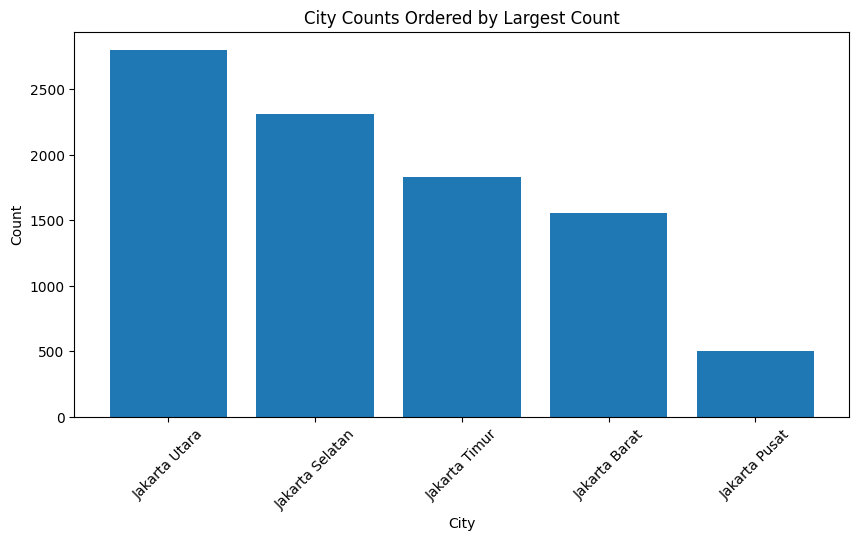

In [23]:
import matplotlib.pyplot as plt

# Bar plot for categorical features

# Count occurrences of each city
city_counts = df['city'].value_counts()

# Sort the counts in ascending order
sorted_city_counts = city_counts.sort_values(ascending = False)

# Plot the histogram
plt.figure(figsize=(10, 5))
plt.bar(sorted_city_counts.index, sorted_city_counts.values, width=0.8)
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.title('City Counts Ordered by Largest Count')
plt.show()

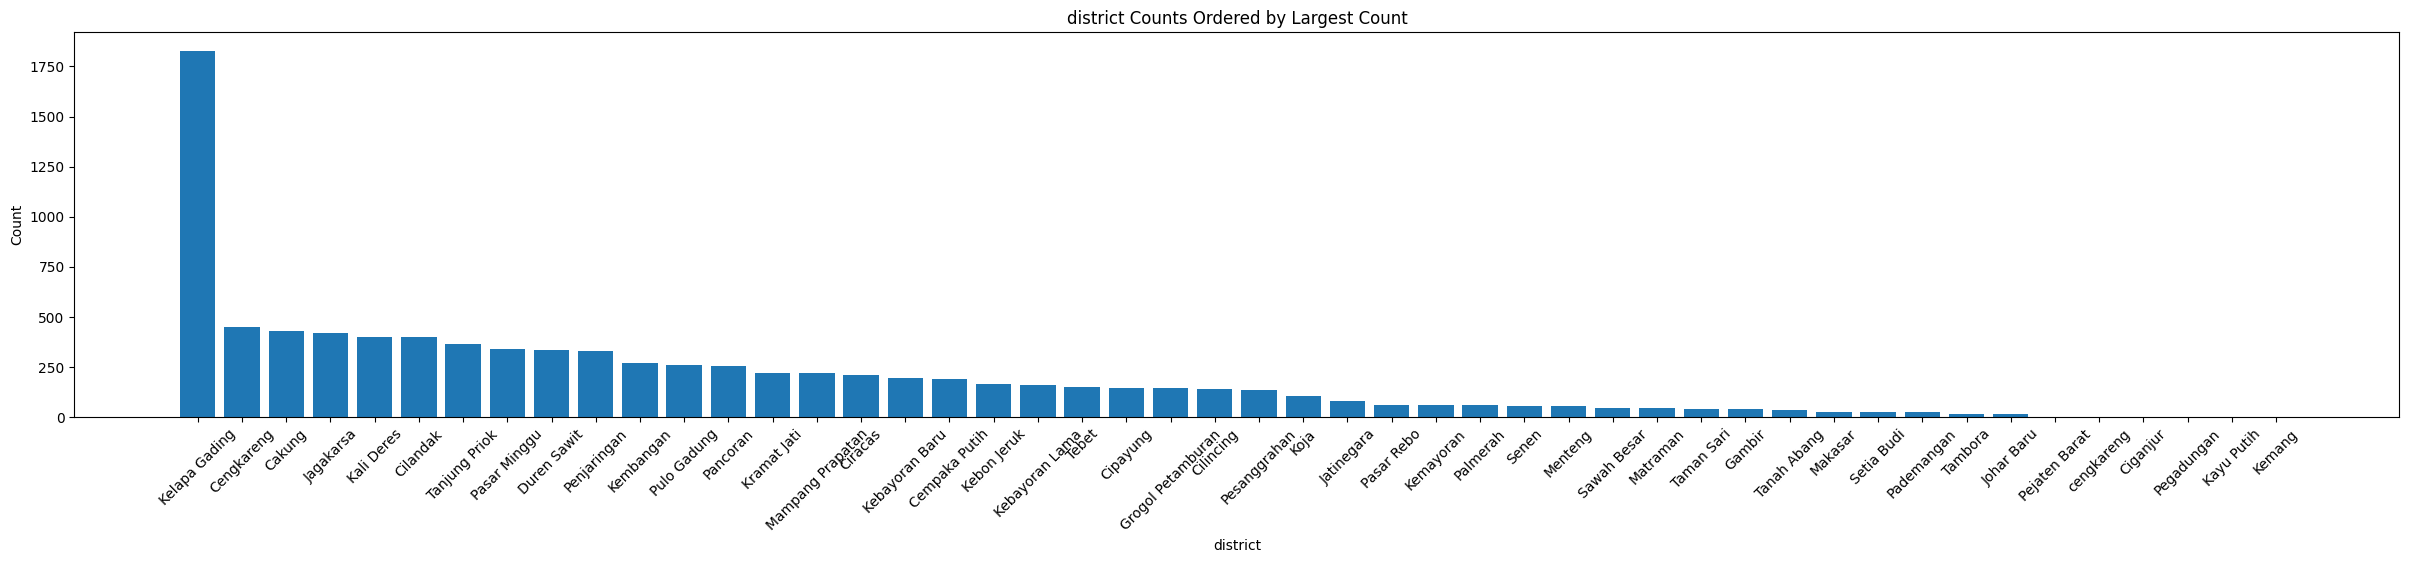

In [24]:
# Count occurrences of each district
district_counts = df['district'].value_counts()

# Sort the counts in ascending order
sorted_district_counts = district_counts.sort_values(ascending = False)

# Plot the histogram
plt.figure(figsize=(30, 5))
plt.bar(sorted_district_counts.index, sorted_district_counts.values, width=0.8)
plt.xlabel('district')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability if needed
plt.title('district Counts Ordered by Largest Count')
plt.show()

######Findings📝📝

*   The Barchart above shows that 'Jakarta Utara' has the most house listing according to the website, specifically in the 'Kelapa Gading' district

#####Bivariate Analysis

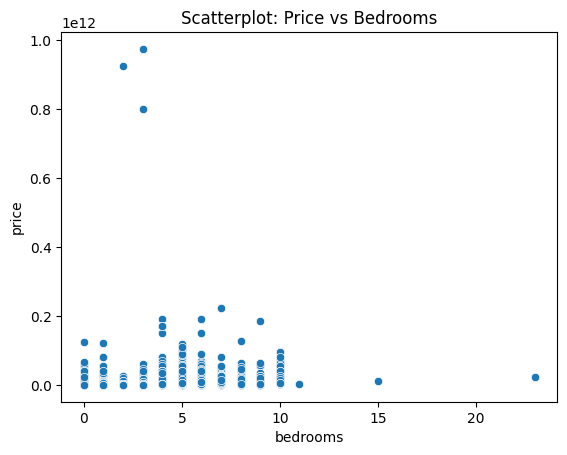

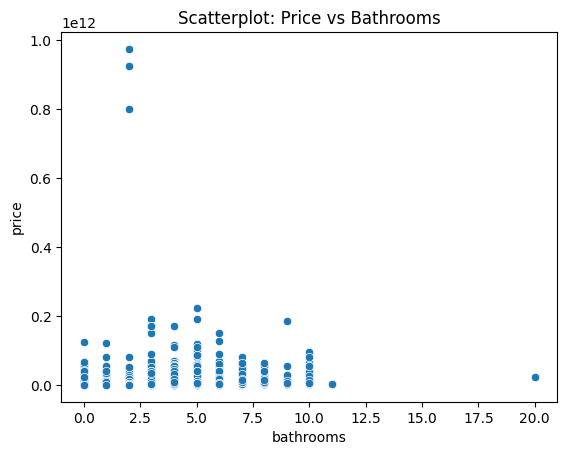

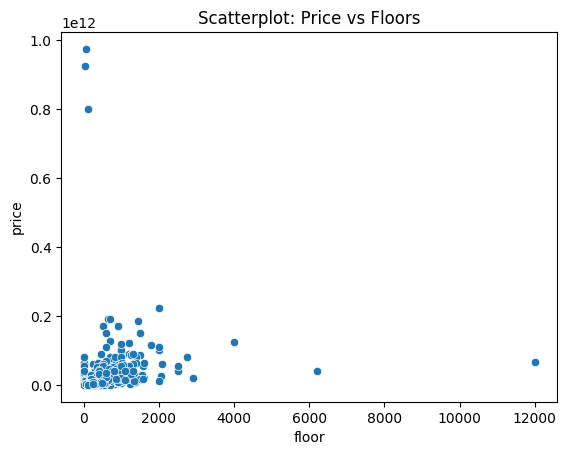

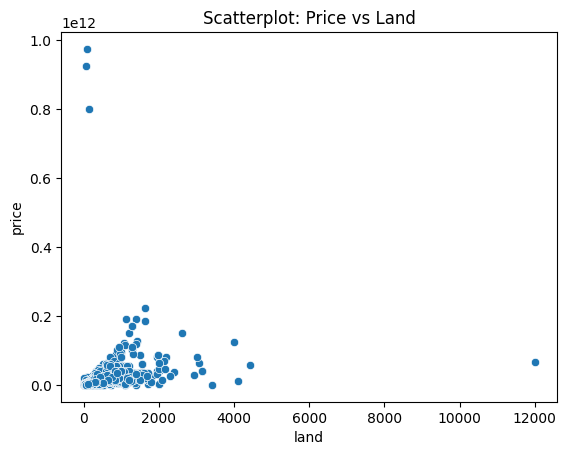

In [25]:
# Scatterplot
import seaborn as sns

sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Scatterplot: Price vs Bedrooms')
plt.show()

sns.scatterplot(data=df, x='bathrooms', y='price')
plt.title('Scatterplot: Price vs Bathrooms')
plt.show()

sns.scatterplot(data=df, x='floor', y='price')
plt.title('Scatterplot: Price vs Floors')
plt.show()

sns.scatterplot(data=df, x='land', y='price')
plt.title('Scatterplot: Price vs Land')
plt.show()

######Findings📝📝

*   The scatterplot above shows an extremely high and extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in many of the numerical columns



land     int64
floor    int64
dtype: object


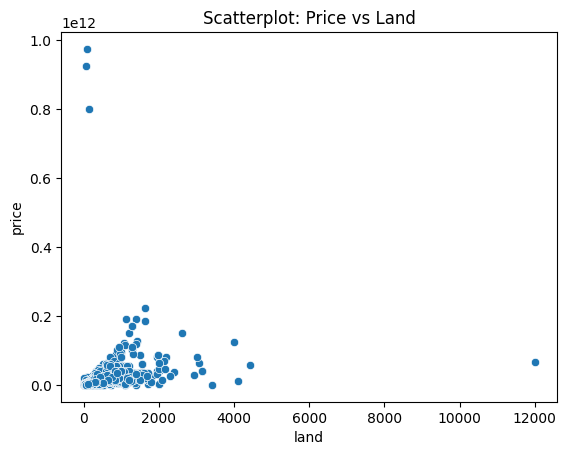

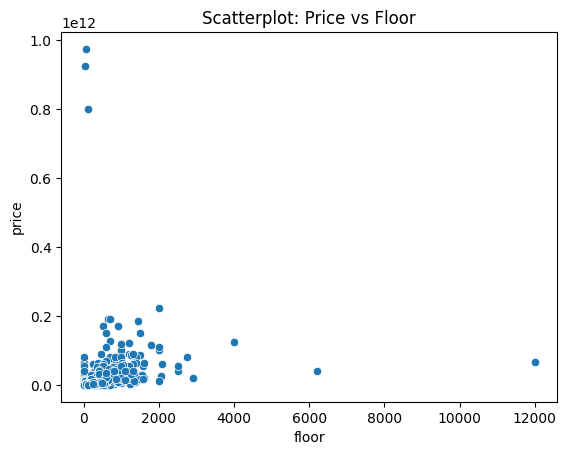

In [26]:
# Check if land and floor are numeric
print(df[['land', 'floor']].dtypes)

# If numeric, plot
sns.scatterplot(data=df, x='land', y='price')
plt.title('Scatterplot: Price vs Land')
plt.show()

sns.scatterplot(data=df, x='floor', y='price')
plt.title('Scatterplot: Price vs Floor')
plt.show()


#####Correlation Analysis

          price      land     floor
price  1.000000  0.313624  0.287269
land   0.313624  1.000000  0.684719
floor  0.287269  0.684719  1.000000


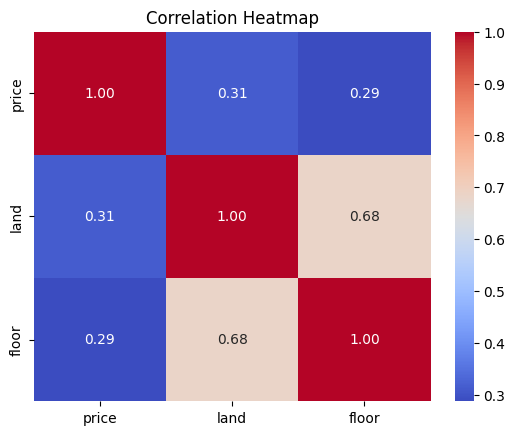

In [27]:
# Compute correlation
correlation_matrix = df[['price', 'land', 'floor']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

######Findings📝📝

*   A correlation of 0.31 indicates a weak positive relationship. Larger land sizes are associated with higher prices, but this factor alone does not strongly influence the price

*   A correlation of 0.29 is also a weak positive relationship. This suggests that as the number of floors increases, the price tends to rise slightly, but the impact is minimal

* A correlation of 0.68 indicates a moderately strong positive relationship. Larger land sizes are often associated with houses that have more floors, which makes logical sense



              price  bedrooms  bathrooms
price      1.000000  0.120401   0.137736
bedrooms   0.120401  1.000000   0.772525
bathrooms  0.137736  0.772525   1.000000


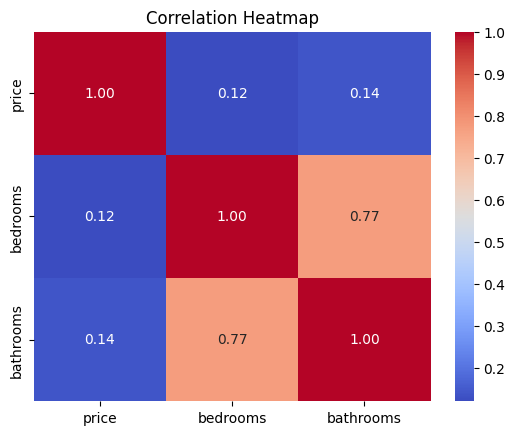

In [28]:
# Compute correlation
correlation_matrix = df[['price', 'bedrooms', 'bathrooms']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

######Findings📝📝

*   A correlation of 0.12 indicates a very weak positive relationship. This means that the number of bedrooms has a minimal impact on the price. As the number of bedrooms increases, the price may rise slightly, but the effect is not significant

*   A correlation of 0.14 also indicates a very weak positive relationship. Similar to bedrooms, the number of bathrooms has a minimal effect on price

* A correlation of 0.77 indicates a strong positive relationship. This makes sense as properties with more bedrooms often tend to have more bathrooms

###C. Outlier Handling

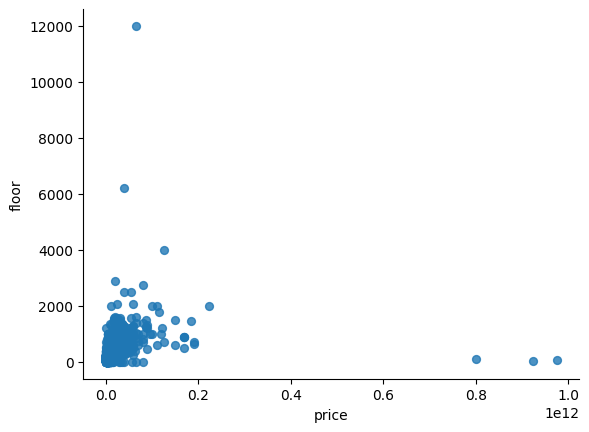

In [29]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='floor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
# Checks for floor distribution
floor_rank = df\
            .assign(rank = df['floor'].rank(method = 'dense', ascending = False))\
            .sort_values('rank')\
            .head(20)

floor_rank[['floor', 'rank']]

,floor,rank
8775,12000,1.0
5891,6195,2.0
7841,4000,3.0
5693,2900,4.0
8890,2750,5.0
1638,2500,6.0
3387,2500,6.0
7784,2070,7.0
2323,2053,8.0
3296,2000,9.0


In [31]:
# Drop floor > 1500, since the gap is getting wider gradually
df = df[df['floor'] <= 1500]

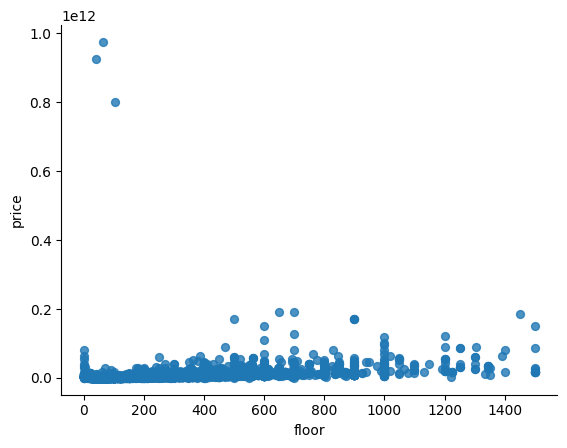

In [32]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='floor', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [33]:
# Checks for price distribution
price_rank = df\
            .assign(rank = df['price'].rank(method = 'dense', ascending = False))\
            .sort_values('rank')\
            .head(40)

price_rank[['price', 'rank']]

,price,rank
1717,9.750000e+11,1.0
1716,9.250000e+11,2.0
4017,8.000000e+11,3.0
460,1.910000e+11,4.0
8591,1.900000e+11,5.0
2334,1.850000e+11,6.0
8389,1.700000e+11,7.0
745,1.700000e+11,7.0
8268,1.700000e+11,7.0
1404,1.700000e+11,7.0


In [34]:
# Drop outlier in the 'price' columns
df = df[df['price'] <= 50000000000]

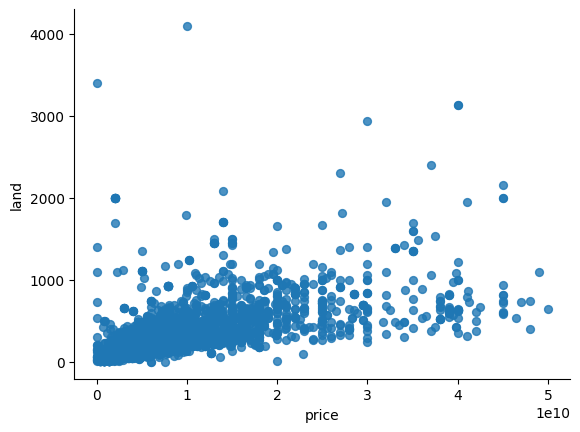

In [35]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='land', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [36]:
land_rank = df\
            .assign(rank = df['land'].rank(method = 'dense', ascending = False))\
            .sort_values('rank')\
            .head(60)

land_rank[['land','price', 'rank']]

,land,price,rank
2217,4100,1.000000e+10,1.0
8374,3400,1.600000e+07,2.0
1401,3135,4.000000e+10,3.0
8002,3135,4.000000e+10,3.0
7550,2935,3.000000e+10,4.0
2200,2400,3.700000e+10,5.0
4138,2306,2.700000e+10,6.0
3806,2156,4.500000e+10,7.0
6290,2083,1.400000e+10,8.0
228,2002,4.500000e+10,9.0


In [37]:
# Drop 'land' above 1500
df = df[df['land'] <= 1500]

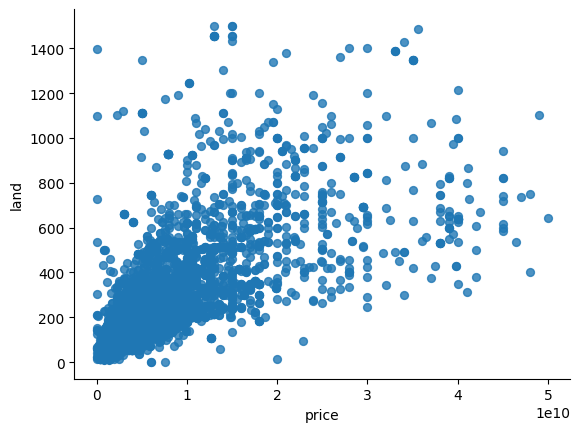

In [38]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='price', y='land', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8875 entries, 0 to 9016
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         8875 non-null   object 
 1   price        8875 non-null   float64
 2   description  8875 non-null   object 
 3   bedrooms     8875 non-null   int64  
 4   bathrooms    8875 non-null   int64  
 5   land         8875 non-null   int64  
 6   floor        8875 non-null   int64  
 7   district     8875 non-null   object 
 8   city         8875 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 693.4+ KB


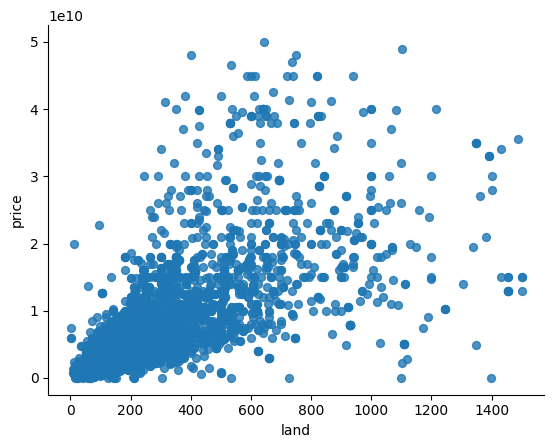

In [40]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='land', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [41]:
from scipy import stats
import numpy as np

df = df[(np.abs(stats.zscore(df['price'])) < 3)]

In [42]:
land_rank = df\
            .assign(rank = df['land'].rank(method = 'dense', ascending = False))\
            .sort_values('rank')\
            .head(60)

land_rank[['land','price', 'rank']]

,land,price,rank
7573,1500,1.500000e+10,1.0
1205,1500,1.300000e+10,1.0
6907,1500,1.500000e+10,1.0
2732,1454,1.500000e+10,2.0
5649,1454,1.300000e+10,2.0
6291,1454,1.300000e+10,2.0
5584,1454,1.300000e+10,2.0
1865,1454,1.500000e+10,2.0
5470,1454,1.300000e+10,2.0
1047,1454,1.300000e+10,2.0


In [43]:
df.shape

(8658, 9)

In [44]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Optional: To confirm the outliers are removed
df_filtered.shape  # This shows the new size of the DataFrame

(8077, 9)

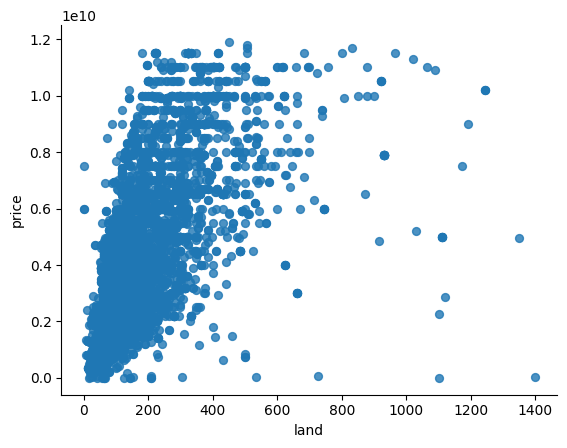

In [45]:
from matplotlib import pyplot as plt
df_filtered.plot(kind='scatter', x='land', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
#Outlier Handling
#2. Hapus price > 2M
df_filtered = df_filtered[df_filtered['land'] <= 500]

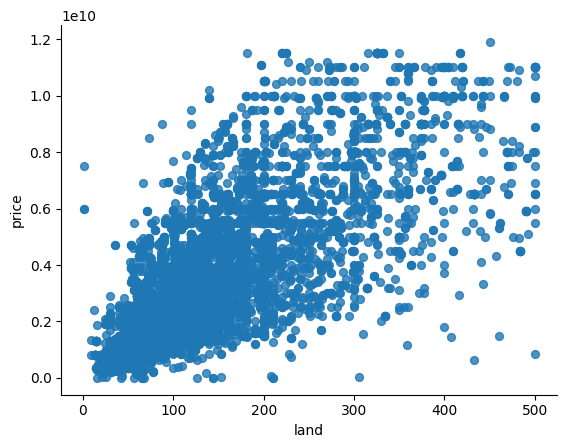

In [47]:
from matplotlib import pyplot as plt
df_filtered.plot(kind='scatter', x='land', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [48]:
df_filtered.shape

(7910, 9)

In [49]:
df_filtered.head()

,date,price,description,bedrooms,bathrooms,land,floor,district,city
0,04/09/2024,5.900000e+09,Dijual Rumah Di Salemba Jakarta Pusat Langsung...,5,3,228,270,Senen,Jakarta Pusat
1,28/08/2024,7.000000e+08,Rumah Mewah 2lt Start 700jt Luas 90M2| Area CI...,3,2,90,59,Pasar Rebo,Jakarta Timur
2,28/08/2024,7.000000e+08,Rumah Mewah 2lt Start 700jt Luas 90M2| Area Ci...,3,2,90,60,Ciracas,Jakarta Timur
3,14/08/2024,3.600000e+09,MURAH DIJUAL 3.6M NEGO KAWASAN KEBON JERUK JAK...,5,4,187,178,Kebon Jeruk,Jakarta Barat
4,13/09/2024,6.720000e+08,Rumah Baru 2 Lantai Minimalis Modern Premium D...,3,2,60,60,Jagakarsa,Jakarta Selatan


In [50]:
df_filtered = df_filtered.drop(['date', 'description'], axis=1)

In [51]:
df_filtered.head()

,price,bedrooms,bathrooms,land,floor,district,city
0,5.900000e+09,5,3,228,270,Senen,Jakarta Pusat
1,7.000000e+08,3,2,90,59,Pasar Rebo,Jakarta Timur
2,7.000000e+08,3,2,90,60,Ciracas,Jakarta Timur
3,3.600000e+09,5,4,187,178,Kebon Jeruk,Jakarta Barat
4,6.720000e+08,3,2,60,60,Jagakarsa,Jakarta Selatan


          price      land     floor
price  1.000000  0.737192  0.722374
land   0.737192  1.000000  0.619927
floor  0.722374  0.619927  1.000000


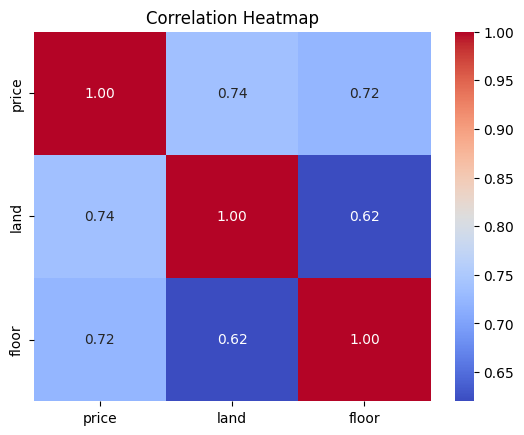

In [52]:
# Compute correlation
correlation_matrix = df[['price', 'land', 'floor']].corr()
print(correlation_matrix)

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

######Findings📝📝


*   After handling some of the outlier, we can see an increase in correlation between the price and the floor as well as land.

* A correlation of 0.737 indicates a strong positive relationship. This means that as the size of the land increases, the price tends to increase significantly

* A correlation of 0.722 indicates a strong positive relationship. This suggests that properties with more floors tend to have higher prices

In [53]:
# df_filtered.to_csv('house_data_transformed.csv', header = True, index = False)